# Problem Statement: Loan Approval Prediction Problem
Type: Binary Classification
Loan approval prediction is classic problem to learn and apply lots of data analysis techniques to
create best Classification model.

Given with the dataset consisting of details of applicants for loan and status whether the loan application is approved or not.
Basis on the a binary classification model is to be created with maximum accuracy.

In [1]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Training Dataset.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


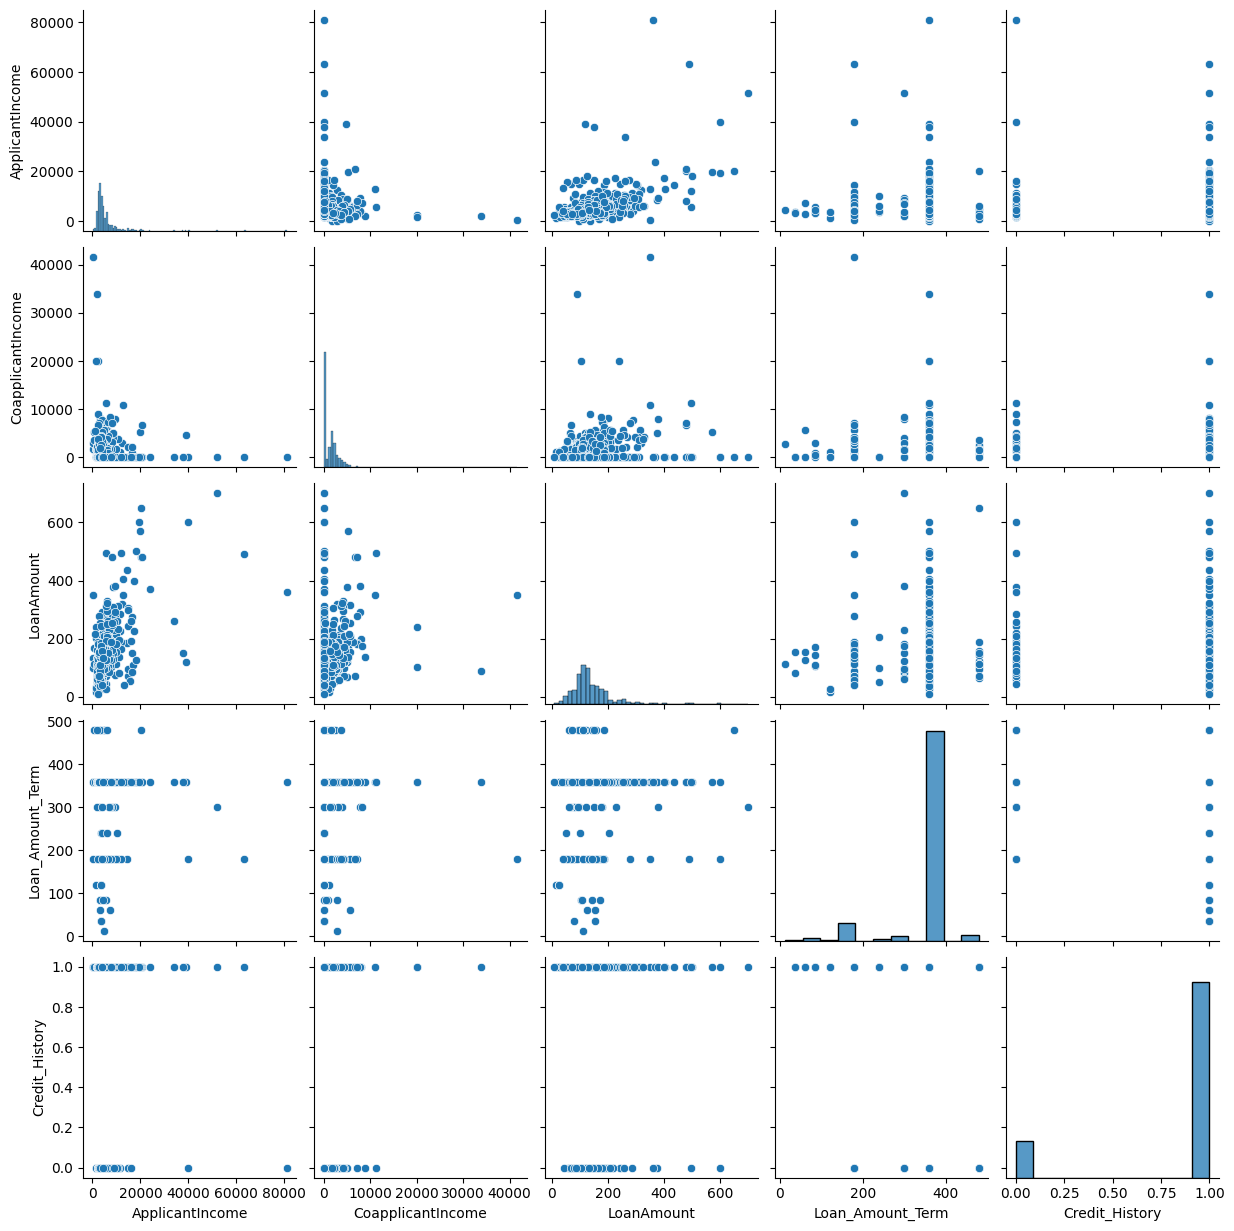

In [4]:
sns.pairplot(data)
plt.show()

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:

fig = px.scatter_matrix(data["ApplicantIncome"])
fig.update_layout(width=700,height=400)
fig.show()

Seems need to work on data preperation

-Loan Amount column does is not fit in Normal Distribution

-Outliers in Applicant's Income and Co-applicant's income


In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

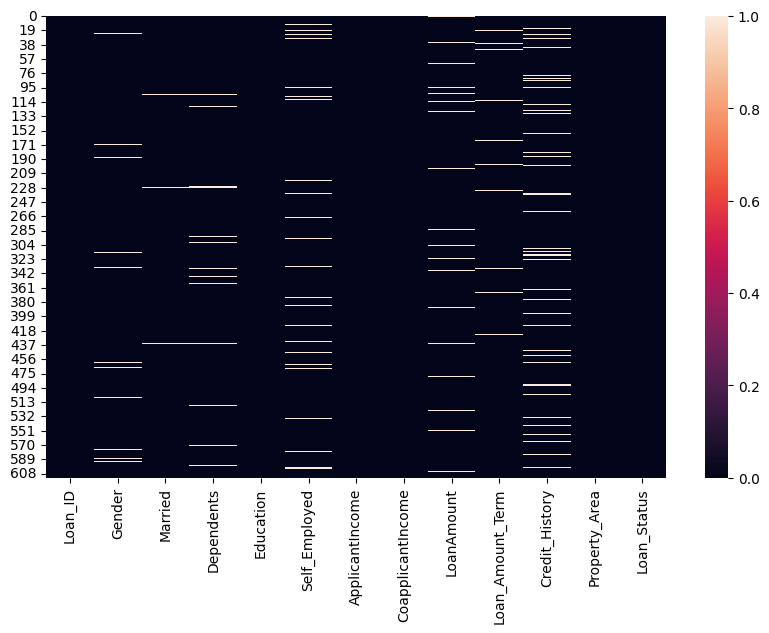

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

# Normal Distribution
Central limit theorem
In simple language we can say that maximum amount of data / or maximum number of data points are near the Mean of the all
data points.

To validate he normal distribution of the data:-
Mean Mode Median are Equal.\n

We can gen identified the distribution of entire data with the help of Mean and Standard Deviation.

When the data is normally distributed maximum data is centralized near the mean value of the data.

To get understanding of distribtuion we can simply plot Distribution plot i.e. Simple Histogram.

Normally Distributed data represents a Bell Shaped curve.

Also Mean , Mode , Median on Normaly Distributed data are equal (Mean=Mode=Median)

One more method is to calculate mean which should be 0 or near to 0 and Standard deviation 1 or near 1.

Mean = sum(All Data Points)/count(Data Points)

Standard Deviation = Root of { sum [Square (each data point - mean of whole data) ] }


In [10]:
#Checking if the non-categorical variables are Normally Distributed or Not. i.e. Checking outliers...

print("Data distribution analysis:->---------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))

fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()


Data distribution analysis:->---------------------------------------


Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  146.41216216216216

Mode:->

ApplicantIncome:  2500
CoapplicantIncome:  0.0
LoanAmount:  nan

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  nan

Standard Deviation:->

ApplicantIncome:  6104.0648565338915
CoapplicantIncome:  2923.8644597700595
LoanAmount:  85.51500809120331


From above graphs found these variables are not normaly distributed.

Foud right-skewed distribution in these three variabels.


In [11]:
plt.figure(figsize=(10,5))
fig = px.bar(data,x=data["Gender"])
fig.show()

fig = px.bar(data,x=data["Married"])
fig.show()

fig = px.bar(data,x=data["Education"],color="Education")
fig.show()

fig = px.bar(data,x=data["Self_Employed"])
fig.show()

fig = px.bar(data,x=data["Dependents"])
fig.show()

fig = px.bar(data,x=data["Property_Area"])
fig.show()

fig = px.bar(data,x=data["Loan_Status"],color="Loan_Status")
fig.show()


<Figure size 1000x500 with 0 Axes>

Prepare data for model training i.e. removing ouliers , filling null values , removing skewness

In [12]:
print(data["Gender"].value_counts())
print(data["Married"].value_counts())
print(data["Self_Employed"].value_counts())
print(data["Dependents"].value_counts())
print(data["Credit_History"].value_counts())
print(data["Loan_Amount_Term"].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


->Taking mode of values in a column will be best way to fill null values.
->Not mean because values are not ordinal but are categorical.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

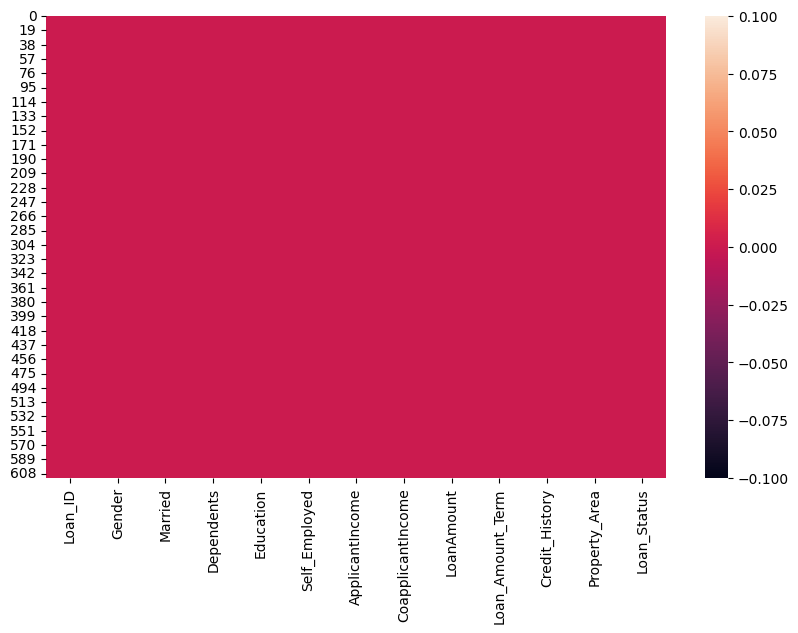

In [13]:
#Filling all Nan values with mode of respective variable
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

#All values of "Dependents" columns were of "str" form now converting to "int" form.
data["Dependents"] = data["Dependents"].replace('3+',int(3))
data["Dependents"] = data["Dependents"].replace('1',int(1))
data["Dependents"] = data["Dependents"].replace('2',int(2))
data["Dependents"] = data["Dependents"].replace('0',int(0))

data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

print(data.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [14]:
#Treating outliers and Converting data to Normal Distribution
#Before removing outlier

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))

fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

####################################################################################################
#Getting log value :->

data["ApplicantIncome"] = np.log(data["ApplicantIncome"])
#As "CoapplicantIncome" columns has some "0" values we will get log values except "0"
data["CoapplicantIncome"] = [np.log(i) if i!=0 else 0 for i in data["CoapplicantIncome"]]
data["LoanAmount"] = np.log(data["LoanAmount"])
####################################################################################################

print("---------------------------After converting to Normal Distributed data----------------------")

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))

plt.figure(figsize=(10,4))
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()




Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  145.75244299674267

Mode:->

ApplicantIncome:  2500
CoapplicantIncome:  0.0
LoanAmount:  128.0

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  128.0

Standard Deviation:->

ApplicantIncome:  6104.0648565338915
CoapplicantIncome:  2923.8644597700595
LoanAmount:  84.03871423798937


---------------------------After converting to Normal Distributed data----------------------

Mean:->

ApplicantIncome:  8.341213093227006
CoapplicantIncome:  4.289733227820409
LoanAmount:  4.857250194811088

Mode:->

ApplicantIncome:  7.824046010856292
CoapplicantIncome:  0.0
LoanAmount:  4.852030263919617

Median:->

ApplicantIncome:  8.246040412315828
CoapplicantIncome:  7.080283635438671
LoanAmount:  4.852030263919617

Standard Deviation:->

ApplicantIncome:  0.6447375297521023
CoapplicantIncome:  3.8725225987499248
LoanAmount:  0.49559166063018034


<Figure size 1000x400 with 0 Axes>

Now we can see that Bell Curve for all three variables and data is normally distributed now.

In [15]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.852030,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,360.0,1.0,Urban,Y


In [16]:
data["Gender"] = le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])

#data = pd.get_dummies(data)
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


# Feature Importance

In order to create best predictive model we need to best understand the available data and
get most information from the data.

In multivariate data it is important to understand the iortance of varialbes and
how much they are contributing towards the target variable. Such that we can remove unnecessary variables to increase
model performance.

Many times dataset consists of exta columns which do not identically serve information to classify the data.
This leads in Wrong Assumption of model while training.

To understand the importance of the data we are going to use Machine Learning classifiers and
then will plot bar graph based on importance.

Also XGBoost has built-in Feature Importance Plotting tool which we are going to use.

Using more than one classifier will increase the confidence on our assumption of which variables to keep
and which to remove.

In [17]:
#Dividing data into Input X variables and Target Y variable
X = data.drop(["Loan_Status","Loan_ID"],axis=1)
y = data["Loan_Status"]

Feature importance by XGBoost:->

Gender -> 0.023329595
Married -> 0.043940846
Dependents -> 0.03970982
Education -> 0.05890409
Self_Employed -> 0.047676113
ApplicantIncome -> 0.0486292
CoapplicantIncome -> 0.054745004
LoanAmount -> 0.04908507
Loan_Amount_Term -> 0.051258586
Credit_History -> 0.5376038
Property_Area -> 0.04511782


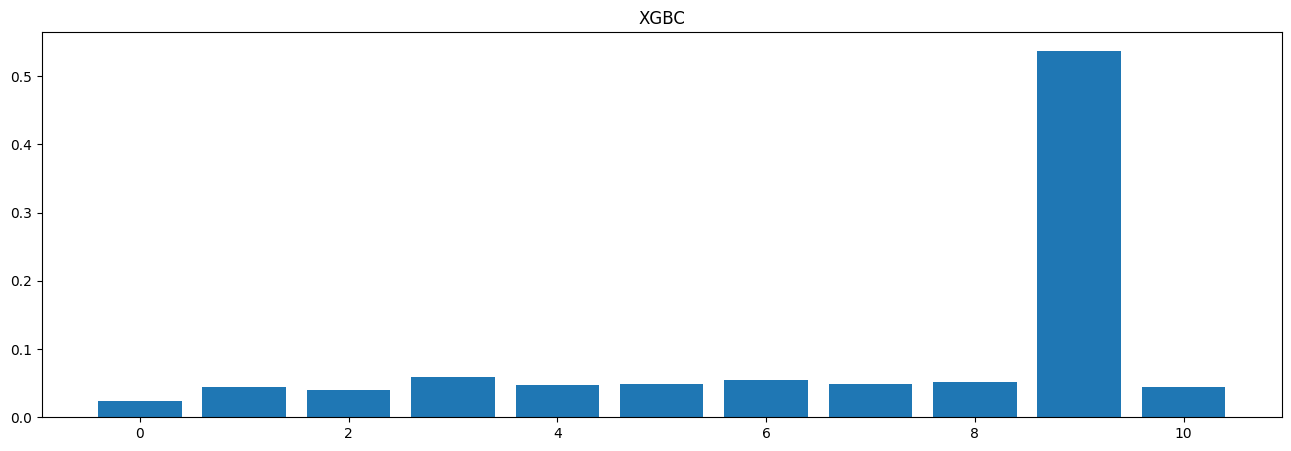

Feature importance by Random Forest:->

Gender -> 0.01892881925130411
Married -> 0.02241679652311051
Dependents -> 0.04651886174604622
Education -> 0.02179852143094796
Self_Employed -> 0.016751579166470965
ApplicantIncome -> 0.20530652378210026
CoapplicantIncome -> 0.11646925606363853
LoanAmount -> 0.19036101156128934
Loan_Amount_Term -> 0.04305377066386514
Credit_History -> 0.2711743430334864
Property_Area -> 0.047220516777740404


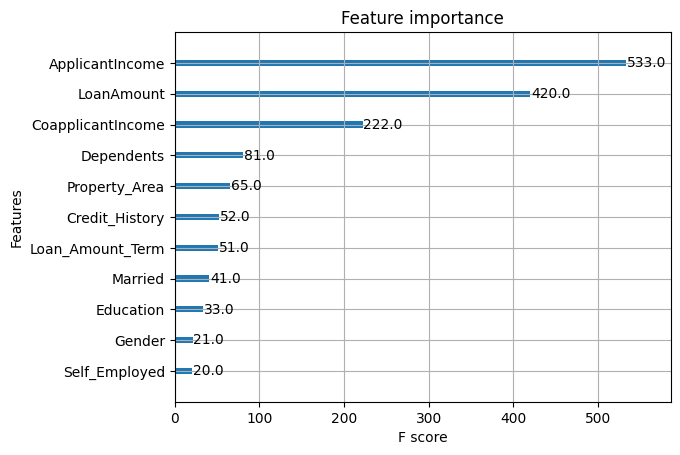

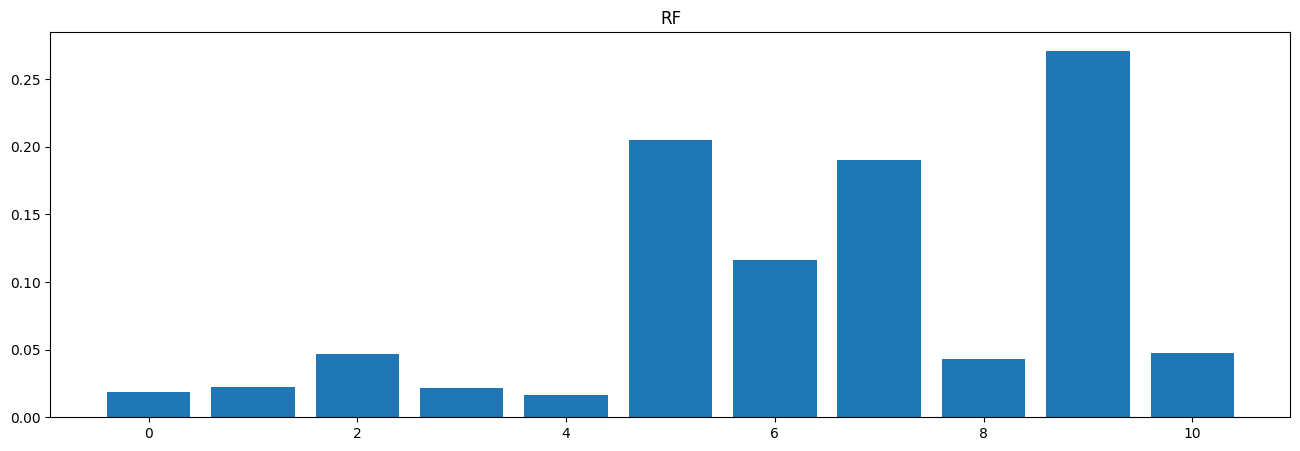

Feature importance by Decision Tree:->

Gender -> 0.011409102378444794
Married -> 0.01822108916438677
Dependents -> 0.06352042805015556
Education -> 0.01996086477349334
Self_Employed -> 0.014479395875648835
ApplicantIncome -> 0.24268656485957374
CoapplicantIncome -> 0.08816106191027193
LoanAmount -> 0.18159326849589713
Loan_Amount_Term -> 0.0363765764182782
Credit_History -> 0.29220086689201125
Property_Area -> 0.03139078118183836


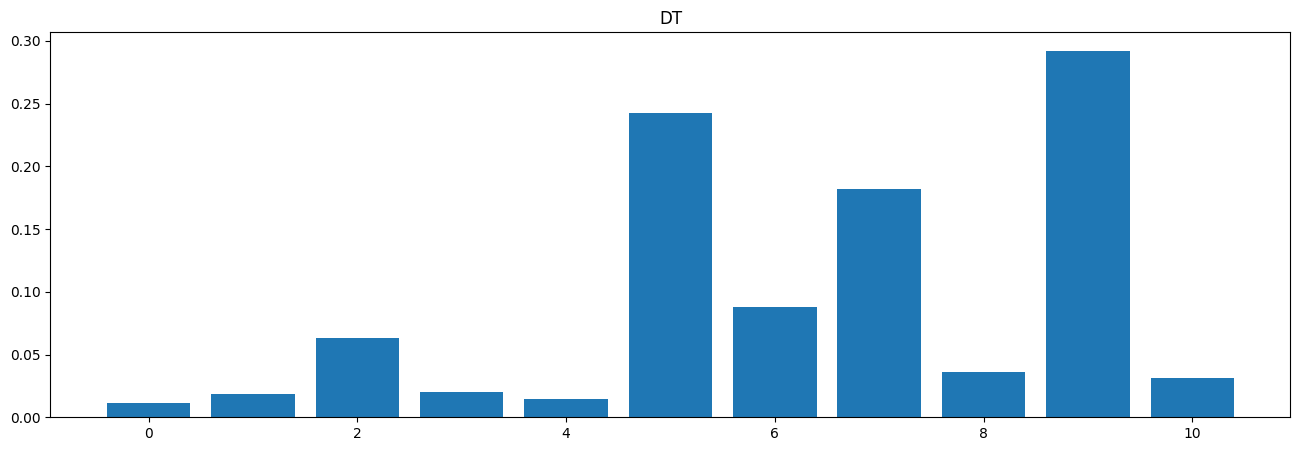

Feature importance by Suppoprt Vector Machine:->

Gender -> -0.011153748611395287
Married -> 0.016433621802949716
Dependents -> -0.0003948864299205823
Education -> -0.007897250281862611
Self_Employed -> -0.0045186612877454735
ApplicantIncome -> 0.009509713938893327
CoapplicantIncome -> 0.0009391121595605512
LoanAmount -> -0.012713675348784648
Loan_Amount_Term -> 8.910680668350324e-05
Credit_History -> 2.0812104159306477
Property_Area -> -0.0006557085562250223


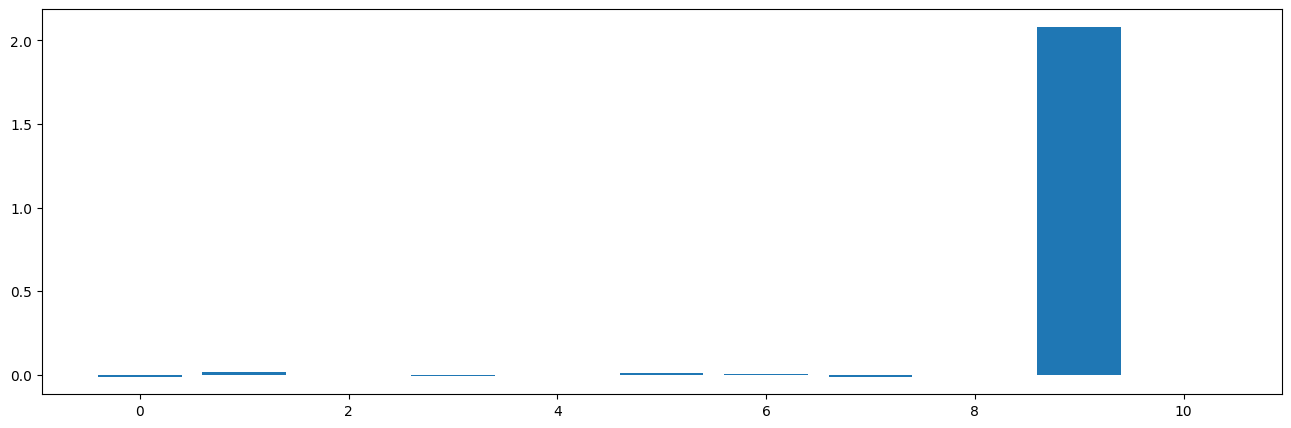

Feature importance by Logistic Regression:->

Gender -> -0.16049205754499127
Married -> 0.4318044368656096
Dependents -> 0.05622383360085621
Education -> -0.4139565798999101
Self_Employed -> 0.04271984818162127
ApplicantIncome -> 0.10257613074067891
CoapplicantIncome -> 0.04607333558301258
LoanAmount -> -0.5499441933640734
Loan_Amount_Term -> -0.0012411324727406067
Credit_History -> 3.270667707191756
Property_Area -> 0.05634297740683534


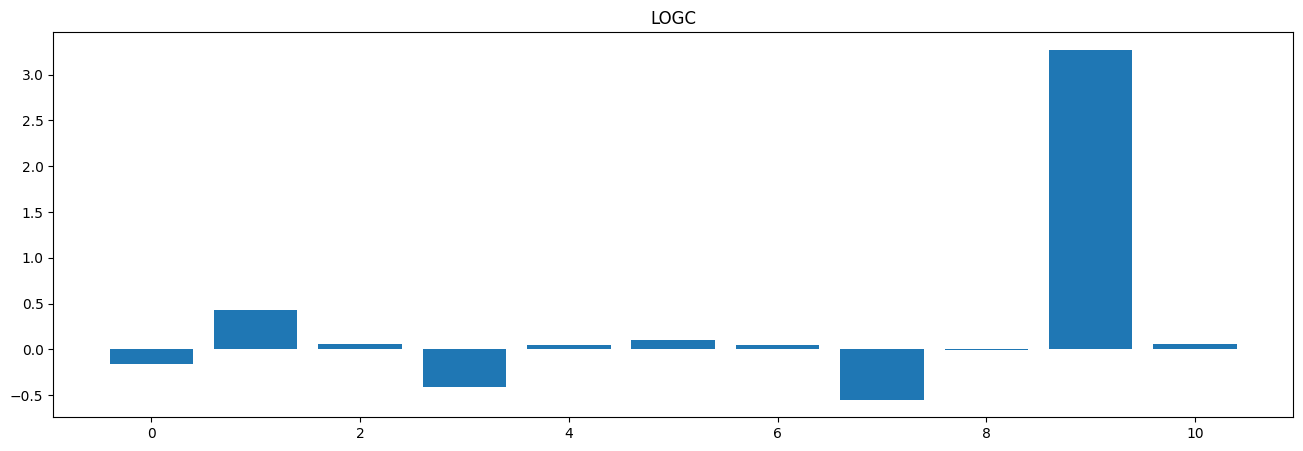

In [18]:
print("Feature importance by XGBoost:->\n")
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

plot_importance(XGBR)

print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Decision Tree:->\n")
DT = DecisionTreeClassifier()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Suppoprt Vector Machine:->\n")
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()
LOGC.fit(X,y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()


From feature importance => Credit History , ApplicantIncome , CoapplicantIncome, LoanAmount are the most important features

# Is data Balanced ?

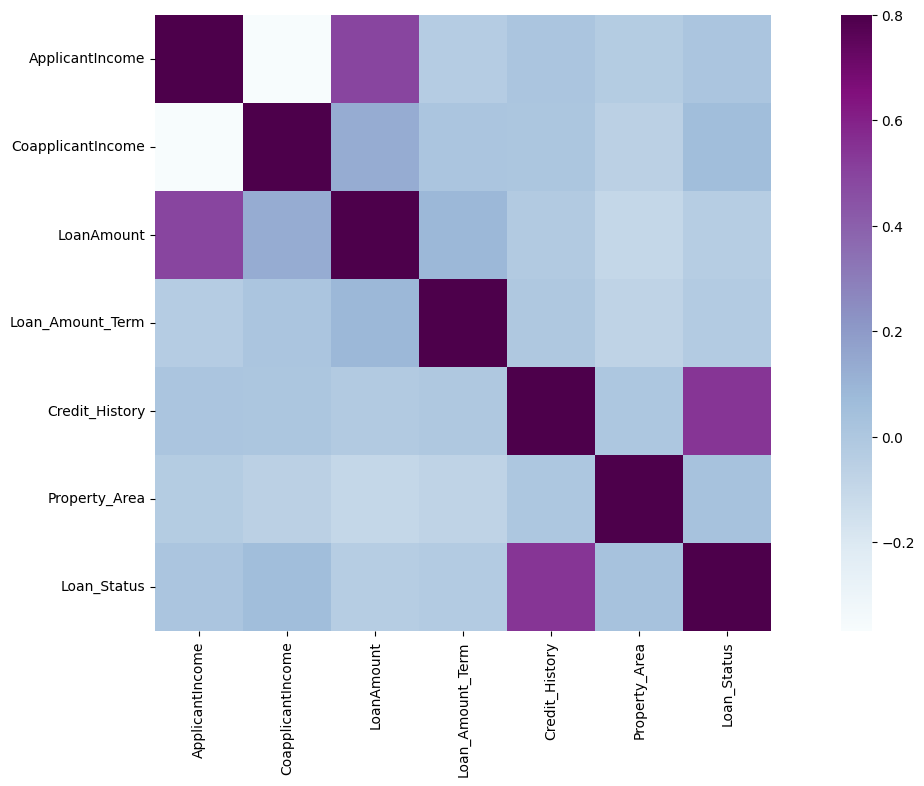

In [21]:
numeric_columns = data.drop(["Gender", "Married", "Dependents", "Education", "Self_Employed"], axis=1).select_dtypes(include=[float, int]).columns

# Calculate the correlation matrix
matrix = data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(18,8))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")
plt.show()

It seems Application income and Loan Amount is correlated , also Coapplication income correlated with Loan Aount then
Credit history is corrleated with Loan Status

In [22]:
A = list(data.Loan_Status).count(1)
B = list(data.Loan_Status).count(0)
print("Count of 1<Approved>: ",A,"\nCount of 0<Rejected>: ",B)

fig = px.bar((A,B),x=["Approved","Rejected"],y=[A,B],color=[A,B])
fig.show()

Count of 1<Approved>:  422 
Count of 0<Rejected>:  192


It seems that data is highly Imbalanced.

When the target classes does not have equal count then the data is considered as imbalanced data.

From above graph it seems that dataset contains more records with Approved Loan_Status than Rejected Loan_Status.
422 over 192

If data would have maximum of 20-30 records difference that time this imabalnced would be ignorable.

Which will lead to make wrong assumptions by model and also model will be biased after training.
We will overcome this issue by balancing the data.

To overcome this problem we will balance the data using Resampling technique with Upsample and Downsample.

In [23]:
#To keep original data as it is to use the same for later.
new_data = data.copy()

#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]

#Here we are downsampling the Majority Class Data Points.
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())

#Here we are upsampling the Minority Class Data Points.
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Downsampled data:->
 Loan_Status
1    192
0    192
Name: count, dtype: int64
Upsampled data:->
 Loan_Status
1    422
0    422
Name: count, dtype: int64


# Data Standardization / Normalization

Data normalization is required when the vriable values are in very distinct range.

For Ex. Suppose we have 2 columns "Age" and "Income"

Where value range of "Age" lying in 0-100 Approx.
and value range of "Income" lying in 20,000 to 100,000

At this time model will perform poorly on testig data as all input values are not in same value range.

So not every time but whenever we get such type of data we need to normalized it i.e. Rescale it.

Widely used scaling tools are Min-Max Scaler and Standard-Scaler

Data Normalization is done by Min-Max Scaler which  scales all th values between 0 to 1 range.

Data standardization is done by Standard-Scaler which scales the data so that Mean of observed data is 0 and Standard Deviation is 1.

As our data is not much normally distributed we will choose Standardization using Standard-Scaler aiming that it will reduce
more skewness and contribute in accuracy gain.

# Experimental Modeling

In order to gain maximum posible accuracy one needs to conduct much emor experiments.

We will pass data on by one with different state i.e.

-Only Scaled data

-Scaled + Down Sampled Data

-Scaled + Up Sampled Data

-Scaled + Up Sampled Data + Selected feature with respective importance.

In [26]:
# Prepare data
X = new_data.drop(["Loan_Status", "Loan_ID"], axis=1)
y = new_data["Loan_Status"]
counter = Counter(y)
print("Counter: ", counter)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scaling data
StSc = StandardScaler()
X_train = StSc.fit_transform(X_train)
X_test = StSc.transform(X_test)

# Check mean is 0 and standard deviation is 1
print("After Standardization\nMean ", np.mean(X_train), "Standard Deviation ", np.std(X_train), "\n")

# Voting ensemble method
models = []
models.append(("XGB", XGBClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("ADB", AdaBoostClassifier()))
models.append(("GB", GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print(classification_report(y_pred, y_test))
print("Voting Ensemble:>", accuracy_score(y_pred, y_test))

# SVM
SVM = SVC(kernel="linear", class_weight="balanced", probability=True)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred, y_test))
print("SVM:>", accuracy_score(y_pred, y_test))

# XGBoost
XGBC = XGBClassifier(
    learning_rate=0.1, n_estimators=10000, max_depth=4, min_child_weight=6, gamma=0, subsample=0.6,
    colsample_bytree=0.8, reg_alpha=0.005, objective='binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train, y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred, y_test))
print("XGBoost:>", accuracy_score(y_pred, y_test))

# RandomForest
Model1 = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=1000, max_depth=70, bootstrap=True)
Model1.fit(X_train, y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred, y_test))
print("RandomForestClassifier:>", accuracy_score(y_pred, y_test))

# GradientBoosting
Model2 = GradientBoostingClassifier()
Model2.fit(X_train, y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred, y_test))
print("GradientBoostingClassifier:>", accuracy_score(y_pred, y_test))

# DecisionTree
Model3 = DecisionTreeClassifier(
    class_weight=None, criterion='gini', max_depth=100, max_features=1.0, max_leaf_nodes=10,
    min_impurity_decrease=1e-07, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.10,
    random_state=27, splitter='best')
Model3.fit(X_train, y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred, y_test))
print("DecisionTreeClassifier:>", accuracy_score(y_pred, y_test))

# AdaBoost
Model4 = AdaBoostClassifier()
Model4.fit(X_train, y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred, y_test))
print("AdaBoostClassifier:>", accuracy_score(y_pred, y_test))

# LinearDiscriminantAnalysis
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train, y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred, y_test))
print("LinearDiscriminantAnalysis:>", accuracy_score(y_pred, y_test), "\n")

# KNeighbors
KNN = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=20)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred, y_test))
print("KNeighborsClassifier:>", accuracy_score(y_pred, y_test))

# GaussianNB
Model7 = GaussianNB()
Model7.fit(X_train, y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred, y_test))
print("GaussianNB:>", accuracy_score(y_pred, y_test))

# LogisticRegression
Model8 = LogisticRegression(
    C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr',
    n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Model8.fit(X_train, y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred, y_test))
print("Logistic Regression:>", accuracy_score(y_pred, y_test))

Counter:  Counter({1: 422, 0: 192})
After Standardization
Mean  -1.2357264969740873e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.47      0.74      0.57        27
           1       0.94      0.82      0.87       127

    accuracy                           0.81       154
   macro avg       0.70      0.78      0.72       154
weighted avg       0.85      0.81      0.82       154

Voting Ensemble:> 0.8051948051948052
              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

SVM:> 0.8311688311688312
              precision    recall  f1-score   support

           0       0.35      0.43      0.38        35
           1       0.82      0.76      0.79       119

    ac

In [28]:
X = df_downsampled.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df_downsampled.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scaling data
StSc = StandardScaler()
X_train = StSc.fit_transform(X_train)
X_test = StSc.transform(X_test)

# Check mean is 0 and standard deviation is 1
print("After Standardization\nMean ", np.mean(X_train), "Standard Deviation ", np.std(X_train), "\n")

# Voting ensemble method
models = []
models.append(("XGB", XGBClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("ADB", AdaBoostClassifier()))
models.append(("GB", GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print(classification_report(y_pred, y_test))
print("Voting Ensemble:>", accuracy_score(y_pred, y_test))

# SVM
SVM = SVC(kernel="linear", class_weight="balanced", probability=True)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred, y_test))
print("SVM:>", accuracy_score(y_pred, y_test))

# XGBoost
XGBC = XGBClassifier(
    learning_rate=0.1, n_estimators=10000, max_depth=4, min_child_weight=6, gamma=0, subsample=0.6,
    colsample_bytree=0.8, reg_alpha=0.005, objective='binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train, y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred, y_test))
print("XGBoost:>", accuracy_score(y_pred, y_test))

# RandomForest
Model1 = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=1000, max_depth=70, bootstrap=True)
Model1.fit(X_train, y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred, y_test))
print("RandomForestClassifier:>", accuracy_score(y_pred, y_test))

# GradientBoosting
Model2 = GradientBoostingClassifier()
Model2.fit(X_train, y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred, y_test))
print("GradientBoostingClassifier:>", accuracy_score(y_pred, y_test))

# DecisionTree
Model3 = DecisionTreeClassifier(
    class_weight=None, criterion='gini', max_depth=100, max_features=1.0, max_leaf_nodes=10,
    min_impurity_decrease=1e-07, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.10,
    random_state=27, splitter='best')
Model3.fit(X_train, y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred, y_test))
print("DecisionTreeClassifier:>", accuracy_score(y_pred, y_test))

# AdaBoost
Model4 = AdaBoostClassifier()
Model4.fit(X_train, y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred, y_test))
print("AdaBoostClassifier:>", accuracy_score(y_pred, y_test))

# LinearDiscriminantAnalysis
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train, y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred, y_test))
print("LinearDiscriminantAnalysis:>", accuracy_score(y_pred, y_test))

# KNeighbors
KNN = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=20)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred, y_test))
print("KNeighborsClassifier:>", accuracy_score(y_pred, y_test))

# GaussianNB
Model7 = GaussianNB()
Model7.fit(X_train, y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred, y_test))
print("GaussianNB:>", accuracy_score(y_pred, y_test))

# LogisticRegression
Model8 = LogisticRegression(
    C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr',
    n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Model8.fit(X_train, y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred, y_test))
print("Logistic Regression:>", accuracy_score(y_pred, y_test))

After Standardization
Mean  -3.064327691705293e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.60      0.71      0.65        41
           1       0.75      0.65      0.70        55

    accuracy                           0.68        96
   macro avg       0.68      0.68      0.68        96
weighted avg       0.69      0.68      0.68        96

Voting Ensemble:> 0.6770833333333334
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        20
           1       1.00      0.63      0.77        76

    accuracy                           0.71        96
   macro avg       0.71      0.82      0.68        96
weighted avg       0.88      0.71      0.74        96

SVM:> 0.7083333333333334
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        48
           1       0.65      0.65      0.65        48

    accuracy                           0.65

In [30]:
X = df_upsampled.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df_upsampled.Loan_Status
print(len(X), len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scaling data
StSc = StandardScaler()
X_train = StSc.fit_transform(X_train)
X_test = StSc.transform(X_test)

# Check mean is 0 and standard deviation is 1
print("After Standardization\nMean ", np.mean(X_train), "Standard Deviation ", np.std(X_train), "\n")

# Voting ensemble method
models = []
models.append(("XGB", XGBClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("ADB", AdaBoostClassifier()))
models.append(("GB", GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print(classification_report(y_pred, y_test))
print("Voting Ensemble:>", accuracy_score(y_pred, y_test))

# SVM
SVM = SVC(kernel="linear", class_weight="balanced", probability=True)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred, y_test))
print("SVM:>", accuracy_score(y_pred, y_test))

# XGBoost
XGBC = XGBClassifier(
    learning_rate=0.1, n_estimators=10000, max_depth=4, min_child_weight=6, gamma=0, subsample=0.6,
    colsample_bytree=0.8, reg_alpha=0.005, objective='binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train, y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred, y_test))
print("XGBoost:>", accuracy_score(y_pred, y_test))

# RandomForest
Model1 = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=1000, max_depth=70, bootstrap=True)
Model1.fit(X_train, y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred, y_test))
print("RandomForestClassifier:>", accuracy_score(y_pred, y_test))

# GradientBoosting
Model2 = GradientBoostingClassifier()
Model2.fit(X_train, y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred, y_test))
print("GradientBoostingClassifier:>", accuracy_score(y_pred, y_test))

# DecisionTree
Model3 = DecisionTreeClassifier(
    class_weight=None, criterion='gini', max_depth=100, max_features=1.0, max_leaf_nodes=10,
    min_impurity_decrease=1e-07, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.10,
    random_state=27, splitter='best')
Model3.fit(X_train, y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred, y_test))
print("DecisionTreeClassifier:>", accuracy_score(y_pred, y_test))

# AdaBoost
Model4 = AdaBoostClassifier()
Model4.fit(X_train, y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred, y_test))
print("AdaBoostClassifier:>", accuracy_score(y_pred, y_test))

# LinearDiscriminantAnalysis
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train, y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred, y_test))
print("LinearDiscriminantAnalysis:>", accuracy_score(y_pred, y_test))

# KNeighbors
KNN = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=20)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred, y_test))
print("KNeighborsClassifier:>", accuracy_score(y_pred, y_test))

# GaussianNB
Model7 = GaussianNB()
Model7.fit(X_train, y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred, y_test))
print("GaussianNB:>", accuracy_score(y_pred, y_test))

# LogisticRegression
Model8 = LogisticRegression(
    C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr',
    n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Model8.fit(X_train, y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred, y_test))
print("Logistic Regression:>", accuracy_score(y_pred, y_test))

844 844
After Standardization
Mean  7.143184188310644e-17 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       114
           1       0.86      0.92      0.89        97

    accuracy                           0.90       211
   macro avg       0.90      0.90      0.90       211
weighted avg       0.90      0.90      0.90       211

Voting Ensemble:> 0.8957345971563981
              precision    recall  f1-score   support

           0       0.38      0.95      0.54        43
           1       0.98      0.60      0.75       168

    accuracy                           0.67       211
   macro avg       0.68      0.78      0.64       211
weighted avg       0.86      0.67      0.70       211

SVM:> 0.6729857819905213
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       123
           1       0.77      0.90      0.83        88

    accuracy                        

In [31]:
X = new_data.drop(["Loan_ID", "Gender", "Married", "Education", "Self_Employed", "Loan_Amount_Term", "Loan_Status", "Property_Area"], axis=1)
y = new_data.Loan_Status
print(len(X), len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scaling data
StSc = StandardScaler()
X_train = StSc.fit_transform(X_train)
X_test = StSc.transform(X_test)

# Check mean is 0 and standard deviation is 1
print("After Standardization\nMean ", np.mean(X_train), "Standard Deviation ", np.std(X_train), "\n")

# Voting ensemble method
models = []
models.append(("XGB", XGBClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("ADB", AdaBoostClassifier()))
models.append(("GB", GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print(classification_report(y_pred, y_test))
print("Voting Ensemble:>", accuracy_score(y_pred, y_test))

# SVM
SVM = SVC(kernel="linear", class_weight="balanced", probability=True)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred, y_test))
print("SVM:>", accuracy_score(y_pred, y_test))

# XGBoost
XGBC = XGBClassifier(
    learning_rate=0.1, n_estimators=10000, max_depth=4, min_child_weight=6, gamma=0, subsample=0.6,
    colsample_bytree=0.8, reg_alpha=0.005, objective='binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train, y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred, y_test))
print("XGBoost:>", accuracy_score(y_pred, y_test))

# RandomForest
Model1 = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=1000, max_depth=70, bootstrap=True)
Model1.fit(X_train, y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred, y_test))
print("RandomForestClassifier:>", accuracy_score(y_pred, y_test))

# GradientBoosting
Model2 = GradientBoostingClassifier()
Model2.fit(X_train, y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred, y_test))
print("GradientBoostingClassifier:>", accuracy_score(y_pred, y_test))

# DecisionTree
Model3 = DecisionTreeClassifier(
    class_weight=None, criterion='gini', max_depth=100, max_features=1.0, max_leaf_nodes=10,
    min_impurity_decrease=1e-07, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.10,
    random_state=27, splitter='best')
Model3.fit(X_train, y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred, y_test))
print("DecisionTreeClassifier:>", accuracy_score(y_pred, y_test))

# AdaBoost
Model4 = AdaBoostClassifier()
Model4.fit(X_train, y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred, y_test))
print("AdaBoostClassifier:>", accuracy_score(y_pred, y_test))

# LinearDiscriminantAnalysis
Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train, y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred, y_test))
print("LinearDiscriminantAnalysis:>", accuracy_score(y_pred, y_test))

# KNeighbors
KNN = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=20)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred, y_test))
print("KNeighborsClassifier:>", accuracy_score(y_pred, y_test))

# GaussianNB
Model7 = GaussianNB()
Model7.fit(X_train, y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred, y_test))
print("GaussianNB:>", accuracy_score(y_pred, y_test))

# LogisticRegression
Model8 = LogisticRegression(
    C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr',
    n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Model8.fit(X_train, y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred, y_test))
print("Logistic Regression:>", accuracy_score(y_pred, y_test))

614 614
After Standardization
Mean  -3.2669519263752433e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.49      0.66      0.56        32
           1       0.90      0.82      0.86       122

    accuracy                           0.79       154
   macro avg       0.69      0.74      0.71       154
weighted avg       0.82      0.79      0.80       154

Voting Ensemble:> 0.7857142857142857
              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

SVM:> 0.8311688311688312
              precision    recall  f1-score   support

           0       0.33      0.44      0.37        32
           1       0.84      0.76      0.80       122

    accuracy                      

In [32]:

#Hyperparameters tuning for KNN

#X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)
X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)



leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

LS = best_model.best_estimator_.get_params()['leaf_size']
P = best_model.best_estimator_.get_params()['p']
Num = best_model.best_estimator_.get_params()['n_neighbors']

KNN = KNeighborsClassifier(leaf_size=LS,p=P,n_neighbors=Num)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))

614 614
Best leaf_size: 1
Best p: 1
Best n_neighbors: 10
              precision    recall  f1-score   support

           0       0.49      0.84      0.62        25
           1       0.96      0.83      0.89       129

    accuracy                           0.83       154
   macro avg       0.73      0.83      0.75       154
weighted avg       0.89      0.83      0.85       154

KNeighborsClassifier:> 0.8311688311688312


In [33]:
# Tuning SVM parameters

#X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)
X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


614 614
Best: 0.689468 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.689468 (0.016542) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.686215 (0.027277) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.682434 (0.009840) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.026685) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 0.01, 'gamma': '

# Conclusion
Resut Summary is as below:----->
Algorithm : Accuracy

Experiment 1 : Scaled data only

    Support Vector Machine       83.116
    Decision Tree                83.1168
    Linear Discriminant Analysis 83.166
    KNearest Neighbors           83.766
    Gaussian Naivey Bayes        83.116
    Logistic Regression          83.116

Experiment 2: Sclaed + Down Sampled Data

    AdaBoost         73.95
    Decision Tree    72.91
    Voting Ensemble  71.87


Experiment 3: Sclaed + Up Sampled Data

    Random Forest only 83.88

Experiment 4: Sclaed + Selected features with respective importance

    Support Vector Machine       83.11
    Decision Tree                83.11
    AdaBoost                     82.46
    Linear Discriminant Analysis 83.11
    KNearest Neighbors           83.11
    Gaussian Naivey Bayes        83.11
    Logistic Regression          83.11

Also after parameter tuning with

    KNN 83.11

After all possible experiments Maximum accuracy achieved By making data balanced as Up Sampling. Surprisingly only
Random forest performed well in that state of the data.

Surprisingly feature selection doesn't make increase in accuracy.

